In [1]:
import os 
import glob 
import json
from shutil import copyfile
import cv2
from pascal_voc_writer import Writer

# Create XML

In [2]:
# NEW

file_id, file_name, width, height = [], [], [], []
labels_dict = {}
out_path = f'{os.getcwd()}/selected_train_images/'
if not os.path.isdir(out_path):
    os.makedirs(out_path)


with open('./export-2021-06-29T21_40_01.815Z.json') as f:
    data = json.load(f)
    cnt = 0
    for i in range(len(data)):
        cnt += 1

        file_name = data[i]['External ID'].replace('.png', '.txt')
        name = data[i]['External ID']
        out_name = name.replace('.png', '.xml')
        #idd = data[i]['ID']
        
        
        try:
            if not os.path.isfile(os.path.join(out_path, name)):
                out = os.path.join(out_path, name)
            
                copyfile(os.path.join('./all_images', name), out)

            img = cv2.imread(f'{out_path}{name}')

            h, w, _ = img.shape
            label_list, x, y = [], [], []
            for a in range(len(data[i]['Label']['objects'])):
                
                points = data[i]['Label']['objects'][a]['bbox']
                label = data[i]['Label']['objects'][a]['value']
 
                label_list.append(label)
                x.append([points['left'], (points['left'] + points['width'])])
                y.append([points['top'], (points['top'] + points['height'])])
            
            final = list(zip(label_list, x, y))
            if not final:
                print('empty')
            
            name = os.path.join(out_path, name)
            writer = Writer(name, w, h)
            for item in final:

                min_x, max_x = item[1]
                min_y, max_y = item[2]
                writer.addObject(item[0], min_x, min_y, max_x, max_y)
            writer.save(f'{out_path}{out_name}')

        except:
            pass
        
        
            

# Prepare train, test, & validation sets

In [3]:
import os
import numpy as np
import shutil
import random
import os 
import glob 
import json
from shutil import copyfile
import cv2


# We were just pulling out the png's but we need the ones that also have xml's
png_list = glob.glob('./selected_train_images/*.png')

xml_list = glob.glob('./selected_train_images/*.xml')

xml_basename_list = [i.replace('.xml','') for i in xml_list]
png_basename_list = [i.replace('.png', '') for i in png_list]
common_list = list(set(xml_basename_list).intersection(png_basename_list))
final_list = [i+'.png' for i in common_list]


# # Creating Train / Val / Test folders (One time use)
#root_dir = '/xdisk/ericlyons/big_data/egonzalez/flir_lid_detection'
root_dir = './final_set/'

val_ratio = 0.10
test_ratio = 0.10


os.makedirs(root_dir +'/train')
os.makedirs(root_dir +'/val')
os.makedirs(root_dir +'/test')

allFileNames = np.array(final_list)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])

print(len(train_FileNames), len(val_FileNames), len(test_FileNames))
train_FileNames = [name for name in train_FileNames.tolist()]
val_FileNames = [name for name in val_FileNames.tolist()]
test_FileNames = [name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

    

# Copy-pasting images

for name in train_FileNames:
    # print(name)
    try:
        xml = name.replace('.png', '.xml')
        shutil.copy(name, root_dir +'/train')
        print('yes')
        shutil.copy(xml, root_dir +'/train')
        print('no')
    except:
        pass

for name in val_FileNames:
    try:
        xml = name.replace('.png', '.xml')
        shutil.copy(name, root_dir +'/val')
        shutil.copy(xml, root_dir +'/val')
    except:
        pass
    
for name in test_FileNames:
    try:
        xml = name.replace('.png', '.xml')
        shutil.copy(name, root_dir +'/test')
        shutil.copy(xml, root_dir +'/test')
    except:
        pass
    

32 4 5
Total images:  41
Training:  32
Validation:  4
Testing:  5
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no
yes
no


# Confirm dataset

In [4]:
from detecto.core import Dataset

/home/travis_s/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


{'boxes': tensor([[  580,   140,   765,   339],
        [  858,     0,   961,    50],
        [  604,   390,   730,   523],
        [  491,   682,   752,   887],
        [  789,   943,   864,  1016],
        [ 1004,  1175,  1217,  1348],
        [  823,  1550,   956,  1600],
        [ 1719,   288,  1838,   455],
        [ 1793,   471,  1886,   628],
        [ 2086,   589,  2332,   751],
        [ 1859,   813,  2049,   981],
        [ 2099,   928,  2339,  1096],
        [ 1878,  1426,  2063,  1600],
        [ 2083,  1546,  2268,  1600],
        [ 3894,   139,  4060,   313],
        [ 3771,   467,  3920,   631],
        [ 3556,   650,  3798,   835],
        [ 3788,   919,  3910,  1041],
        [ 4631,    84,  4892,   260],
        [ 4686,   277,  4861,   483],
        [ 4752,   570,  4975,   785],
        [ 4853,   763,  4972,   932],
        [ 4837,  1057,  5016,  1282],
        [ 4583,  1168,  4867,  1300],
        [ 4824,  1513,  4938,  1600],
        [ 6830,     4,  6955,   127],
  

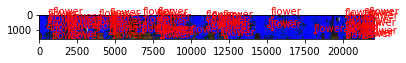

In [5]:
from detecto.core import Dataset

dataset = Dataset('/home/travis_s/repos/infloresence_detection/final_set/train')
from detecto.visualize import show_labeled_image

image, targets = dataset[0]
print(targets)
show_labeled_image(image, targets['boxes'], targets['labels'])

# Train model

In [6]:
from detecto import core, utils, visualize
import os
import random 
import glob
import matplotlib.pyplot as plt
import cv2
from xml.dom import minidom#, parse
import numpy

from torchvision import transforms
from detecto.utils import normalize_transform

In [7]:
os.chdir('./final_set/')

In [13]:

# custom_transforms = transforms.Compose([
#     transforms.ToPILImage(),
#     # Note: all images with a size smaller than 800 will be scaled up in size
#     #transforms.Resize(size=1600),
#     transforms.RandomHorizontalFlip(0.5),
#     #transforms.ColorJitter(brightness=0.5, saturation=0.5),
#     transforms.ToTensor(),  # required
#     normalize_transform(),  # required
# ])

# dataset = core.Dataset('./train/', transform=custom_transforms)

dataset = core.Dataset('./train/')

loader = core.DataLoader(dataset, batch_size=1, shuffle=True)

val_dataset = core.Dataset('./val/')
model = core.Model(['flower'])

losses = model.fit(loader, val_dataset, epochs=15, learning_rate=0.001, verbose=True, lr_step_size=3)

# losses = model.fit(loader, val_dataset, epochs=8, learning_rate=0.01, verbose=True, lr_step_size=3)

  0%|          | 0/32 [00:00<?, ?it/s]

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 15
Begin iterating over training dataset


 44%|████▍     | 14/32 [01:36<02:04,  6.92s/it]


KeyboardInterrupt: 

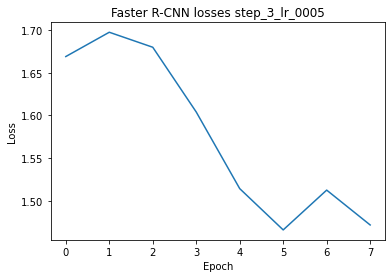

In [ ]:
plt.plot(losses)
plt.title('Faster R-CNN losses step_3_lr_0005')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.show()
plt.savefig('model_weights_infloresence_2021-10-03_cleaned_set.png', dpi=300, transparent=False, facecolor='w', edgecolor='w')

In [5]:
model.save('./model_weights_infloresence_2021-07-11_8epoc_no_transform_w_step_5_lr_001_redo.pth')

['flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower']

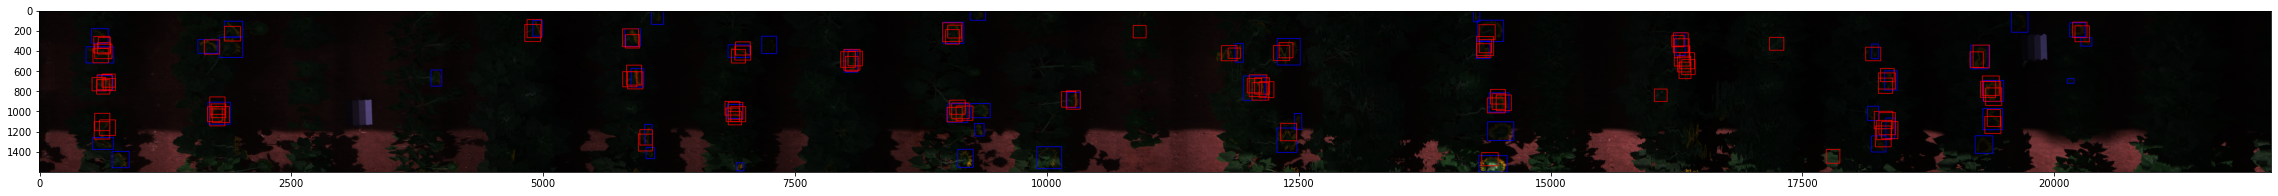

['flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower']

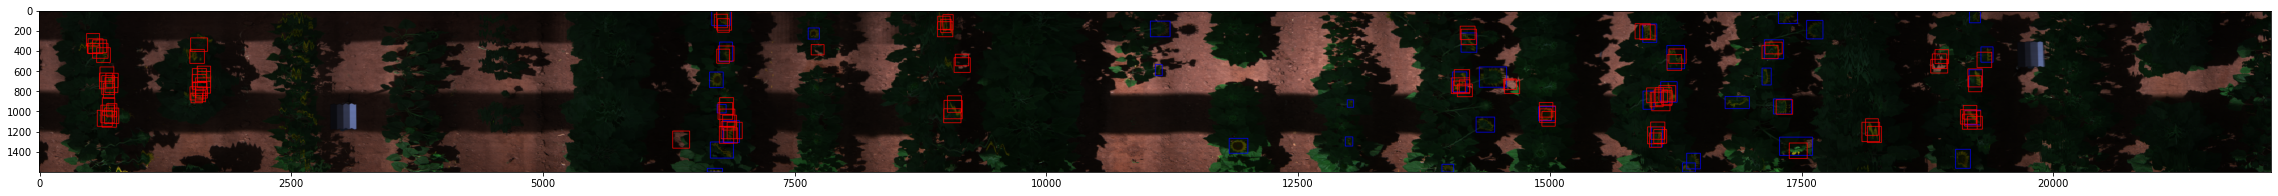

['flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower']

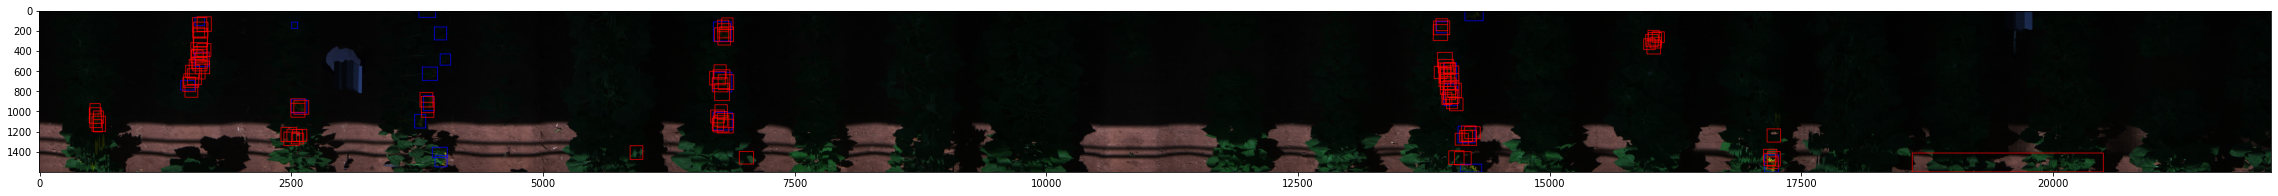

['flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower']

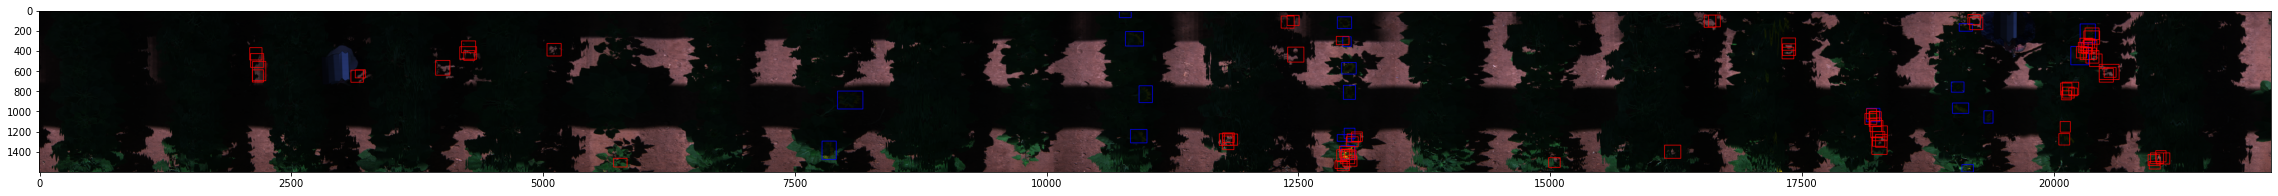

['flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower']

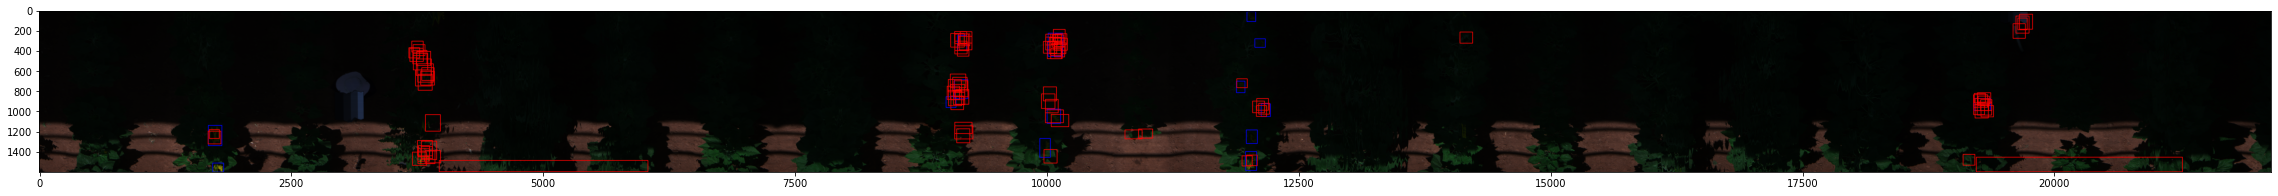

In [6]:
import xml.etree.ElementTree as ET

detect_dict = {}

for img in glob.glob('./test/*.png'):
    cnt = 0
    image = utils.read_image(img)
    predictions = model.predict(image)

    # predictions format: (labels, boxes, scores)
    labels, boxes, scores = predictions
    print(labels, scores)
    a_img = cv2.imread(img)
    a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2RGB)
    copy = a_img.copy()

    xml = img.replace('.png', '.xml')
    mydoc = minidom.parse(xml)
    items = mydoc.getElementsByTagName('object')
    tree = ET.parse(xml)
    root = tree.getroot()

    list_with_all_boxes = []

    for roi in root.iter('object'):
        file_name = root.find('filename').text
        ymin, xmin, ymax, xmax = None, None, None, None 

        ymin = int(roi.find("bndbox/ymin").text)
        xmin = int(roi.find("bndbox/xmin").text)
        ymax = int(roi.find("bndbox/ymax").text)
        xmax = int(roi.find("bndbox/xmax").text)
        gt = [ymin, xmin, ymax, xmax]

        start_point = (xmin, ymax)
        end_point = (xmax, ymin)
        color = (0, 0, 255) 
        thickness = 6
        cv2.rectangle(a_img, start_point, end_point, color, thickness)

    for i, box in enumerate(boxes):

        if scores[i] >= 0.1:
            cnt += 1
            min_x, min_y, max_x, max_y = int(box[0]), int(box[1]), int(box[2]), int(box[3])
            ml = [min_y, min_x, max_y, max_x]

            start_point = (min_x, max_y)
            end_point = (max_x, min_y)
            color = (255, 0, 0) 
            thickness = 6

            new_img = copy[min_y:max_y, min_x:max_x, :]
            cv2.rectangle(a_img, start_point, end_point, color, thickness)

    plt.figure(figsize=(40, 20))
    plt.imshow(a_img) 
    plt.show()  # display it

